# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,
                       1)  # random value between 0 1 with 100 rows and 1 cols
y = 4 + 3 * X + np.random.randn(
    100, 1)  # standard normal distribution with 100 rows 1 columns

Text(0, 0.5, 'y')

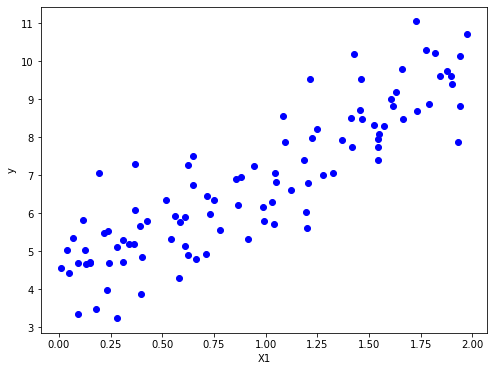

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'bo')
plt.xlabel('X1')
plt.ylabel('y')

In [4]:
# compute theta that minimize the cost function
X_b = np.c_[np.ones((100, 1)), X]  # matrix of 100 * 2
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # normal equation
theta_best

# The Normal Equation gets very slow when the number of features grows large

array([[4.21509616],
       [2.77011339]])

In [5]:
# make prdictions : y_hat = theta ( transpose ) dot x
X_new = ([[0], [2]])  # start and end point

In [6]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

(0.0, 2.0, 0.0, 15.0)

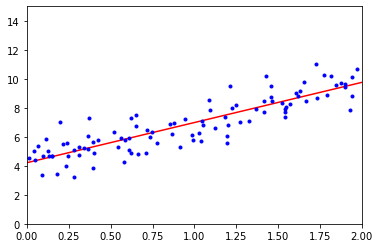

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

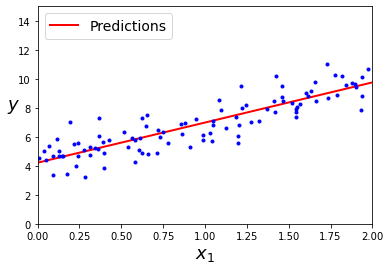

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Scikit-learn approach

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
y_pred = lin_reg.predict(X_new)

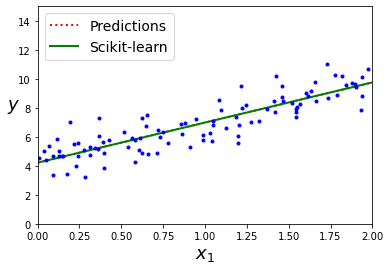

In [12]:
plt.plot(X_new, y_predict, "r:", linewidth=2, label="Predictions")
plt.plot(X_new, y_pred, "g-", linewidth=2, label="Scikit-learn")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Statsmodel approach

In [13]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)

# X_sm == X_b

In [14]:
results = sm.OLS(y, X_sm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.66e-33
Time:                        17:16:31   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2151      0.170     24.753      0.0

In [15]:
y_pred_sm = results.predict(sm.add_constant(X_new))

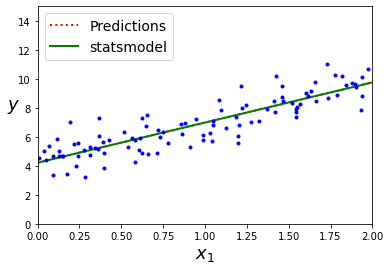

In [16]:
plt.plot(X_new, y_predict, "r:", linewidth=2, label="Predictions")
plt.plot(X_new, y_pred_sm, "g-", linewidth=2, label="statsmodel")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent 

In [17]:
# optimization algorithm
# general idea is to tweak parameters iteratively to minimize cost function

## Batch Gradient Descent

In [18]:
# compute the gradient of the cost func‐ tion with regards to each model parameter θj.
# how much the cost function will change if you change θj  ( partial deriavative )

# batch gradient descent : calculations over the full training set X, at each Gradient Descent step

In [19]:
# 1. gradient vector ( contains all the partial deriavatives of the cost function)

# 2. formula of gradient descent step
# theta ( next step ) = theta - n (learning rate ) * gradient descent vector

1. $ \frac{2}{m} X^T \cdot(X\cdot\theta -y)$
2. $ θ ^{next step} = θ − η ∇_θMSE(θ)$

In [20]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta  # ( same as normal equaltions theta)

array([[4.21509616],
       [2.77011339]])

In [22]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)  # number of features
    plt.plot(X, y, "b.")  # plot the original data points
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)  # predictions
            style = "b-" if iteration > 0 else "r--"  # red dotted line will be the first line
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

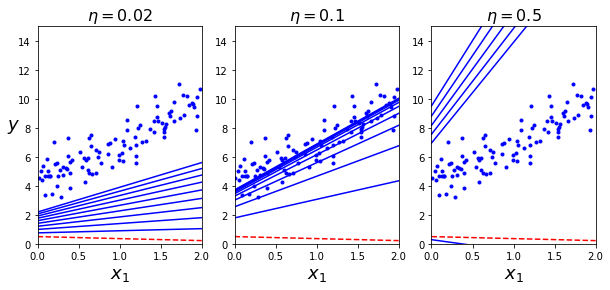

In [23]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

In [24]:
# Stochastic Gradient Descent just picks a random instance in the training set
# at every step and computes the gradients based only on that single instance.

In [25]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

(0.0, 2.0, 0.0, 15.0)

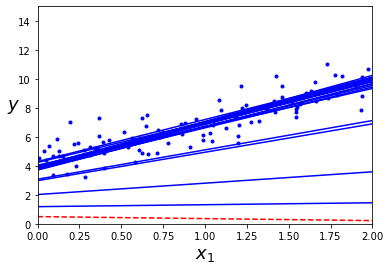

In [26]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:  # not shown in the book
            y_predict = X_new_b.dot(theta)  # not shown
            style = "b-" if i > 0 else "r--"  # not shown
            plt.plot(X_new, y_predict, style)  # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index +
                 1]  # uses one random instance only
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # not shown

plt.plot(X, y, "b.")  # not shown
plt.xlabel("$x_1$", fontsize=18)  # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)  # not shown
plt.axis([0, 2, 0, 15])

In [27]:
theta

array([[4.21076011],
       [2.74856079]])

In [28]:
# using sckit learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-3,
                       penalty=None,
                       eta0=0.1,
                       random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch Gradient Descent

In [29]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(
            0, m,
            minibatch_size):  # train on random instances of fixed size ( 20)
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [31]:
# all theta used
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

(2.5, 4.5, 2.3, 3.9)

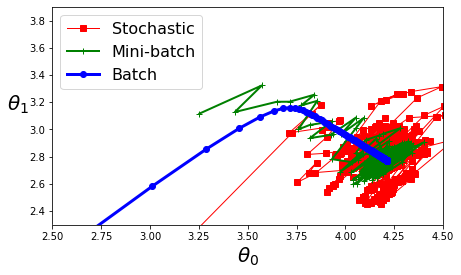

In [32]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0],
         theta_path_sgd[:, 1],
         "r-s",
         linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0],
         theta_path_mgd[:, 1],
         "g-+",
         linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0],
         theta_path_bgd[:, 1],
         "b-o",
         linewidth=3,
         label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

# Polynomial regression

In [33]:
# add powers of each feature as new features
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'y')

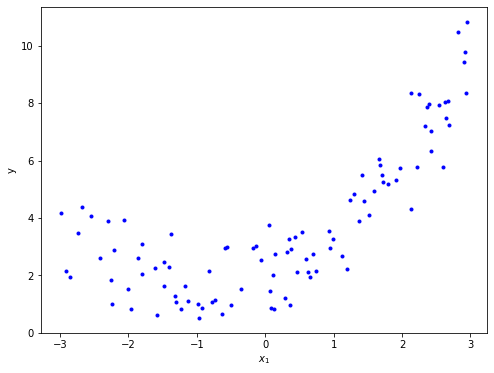

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('y')

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [36]:
X_poly[0]  # contains the original feature of X plus the square of it

array([2.38942838, 5.709368  ])

In [37]:
X[0]

array([2.38942838])

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [39]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

(-3.0, 3.0, 0.0, 10.0)

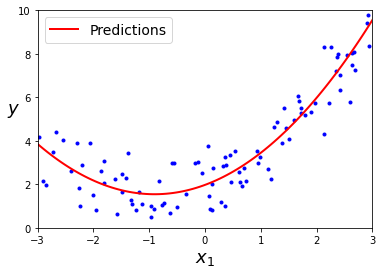

In [40]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

(-3.0, 3.0, 0.0, 10.0)

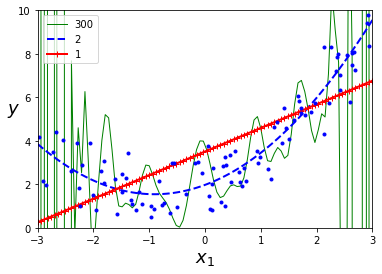

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [42]:
## Learning curves

(0.0, 80.0, 0.0, 3.0)

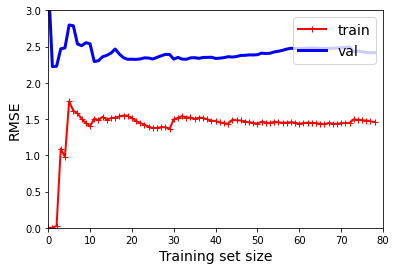

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  # not shown in the book
    plt.xlabel("Training set size", fontsize=14)  # not shown
    plt.ylabel("RMSE", fontsize=14)


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

(0.0, 80.0, 0.0, 3.0)

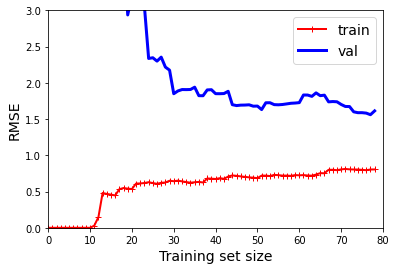

In [44]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

# Regularized linear models

In [45]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

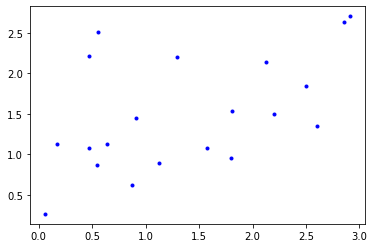

In [46]:
plt.plot(X, y, 'b.')

## Ridge 

cost function = $MSE(\theta)$ + $\alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i$

In [47]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

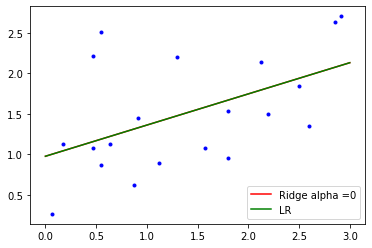

In [48]:
# comparing linear regression and Ridge with alpha = 1 ( linear regression like)
plt.plot(X, y, 'b.')

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0, solver="cholesky", random_state=42)
lr = LinearRegression()
lr.fit(X, y)
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X_new)

plt.plot(X_new, y_pred, 'r', label='Ridge alpha =0')
plt.plot(X_new, lr.predict(X_new), 'g', label='LR')
plt.legend()

# Ridge's alpha = 0 is same as linear regression

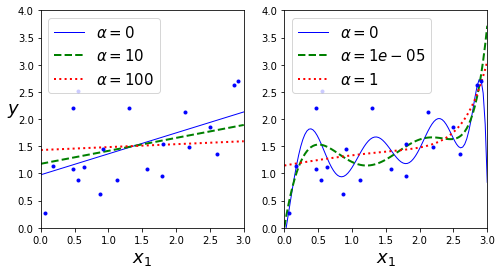

In [49]:
# comparing ridge regression's alpha on linear and polynomial regression
from sklearn.linear_model import Ridge


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **
                            model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features",
                 PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,
                 y_new_regul,
                 style,
                 linewidth=lw,
                 label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

In [50]:
# SGD with l2 == simple ridge regression
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

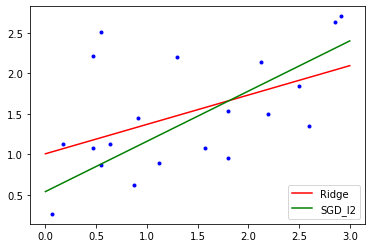

In [51]:
# comparing ridge regression and sgd l2 penalty
plt.plot(X, y, 'b.')
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X_new)
plt.plot(X_new, y_pred, 'r', label='Ridge')
plt.plot(X_new, sgd_reg.predict(X_new), 'g', label='SGD_l2')
plt.legend()

## Lasso regression

cost function = $MSE(\theta)$ + $\alpha \sum^n_{i=1} |\theta_i|$

/Users/samuelwong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


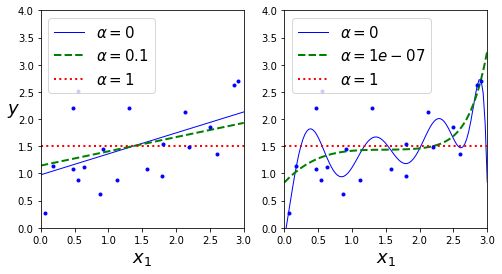

In [52]:
# uses the l1 norm of the weight vector instead of half the square of the l2 norm
# comparing Lasso regression's alpha on linear and polynomial regression

from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

In [53]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

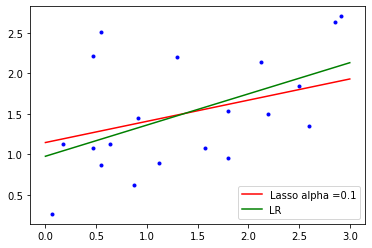

In [54]:
# comparing linear regression and Lasso with alpha = 0.1
plt.plot(X, y, 'b.')

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lr = LinearRegression()
lr.fit(X, y)
y_pred = lasso_reg.predict(X_new)

plt.plot(X_new, y_pred, 'r', label='Lasso alpha =0.1')
plt.plot(X_new, lr.predict(X_new), 'g', label='LR')
plt.legend()

## Elastic net

cost function = $MSE(\theta) + r\alpha \sum^n_{i=1} |\theta_i| + \frac{1-r}{2}\alpha \sum^n_{i=1} \theta^2_i$

In [55]:
# middle groud between ridge and lasso
# r = 0 same as ridge while 1 same as lasso

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5,
                         random_state=42)  # l1_ratio == r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

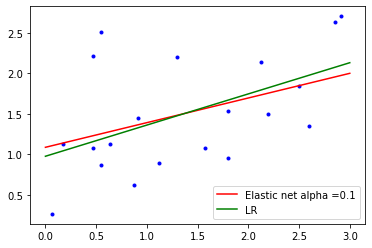

In [56]:
# comparing linear regression and elastic net with alpha = 0.1
plt.plot(X, y, 'b.')

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5,
                         random_state=42)  # l1_ratio == r
elastic_net.fit(X, y)
lr = LinearRegression()
lr.fit(X, y)
y_pred = elastic_net.predict(X_new)

plt.plot(X_new, y_pred, 'r', label='Elastic net alpha =0.1')
plt.plot(X_new, lr.predict(X_new), 'g', label='LR')
plt.legend()

## Early stopping

In [57]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50],
                                                  y[:50].ravel(),
                                                  test_size=0.5,
                                                  random_state=10)

In [60]:
from sklearn.base import clone

poly_scaler = Pipeline([("poly_features",
                         PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [62]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

Text(0, 0.5, 'RMSE')

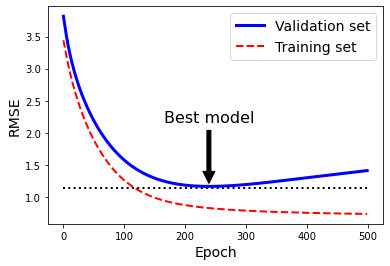

In [73]:
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True, # when fit() called, it continues training where 
                                        # it left off instead of restarting from scratch
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42) # SGD model

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors) # find the index of the minimum error
best_val_rmse = np.sqrt(val_errors[best_epoch]) # the lowest rmse

plt.annotate(
    'Best model',
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 1),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=16,
)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

# Logistic Regression

- for classification
- estimate the probability that an instance belongs to a particular class
- $ probability = \sigma (\theta ^ T \cdot x) $
- $\sigma(\cdot)$, logit is a sigmoid function that outputs number ( 0 to 1 )
- equation : $ \sigma(t) = \frac{1}{1+ exp(-t)} $
- training model to predict high proba for positive and vice versa
- cost function, log loss $c(\theta) = - \frac{1}{m_i} \sum^{m}_{i = 1} [ y^{i} log(phat^{i}) + ( 1- y^{i})log(1-phat^{i})]$

(-10.0, 10.0, -0.1, 1.1)

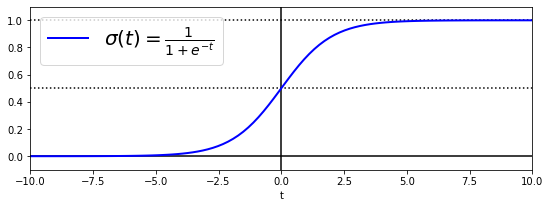

In [77]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

In [79]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [80]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [81]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

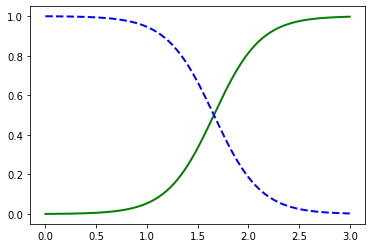

In [84]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica") 
# 1 is positive class's proba
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

(0.0, 3.0, -0.02, 1.02)

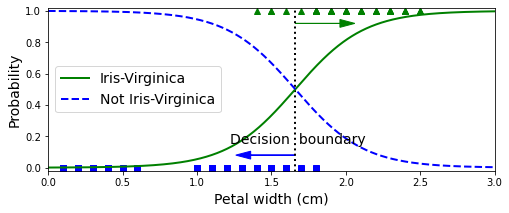

In [85]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

(2.9, 7.0, 0.8, 2.7)

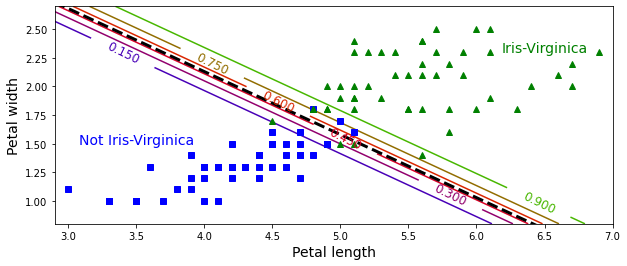

In [92]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

# Soft-max regression (multiclass classification)

- softmax score for class k, $s_k(x) = \theta_k^T \cdot x$
- each class has its own dedicated parameter vector $\theta_k$ and stored as rows in a parameter matrix 
- after computed the score of every class for instance, x, estimates the $proba_hat_k$ that the instance belongs to class k by running the scores through softmax function
- formula :
**$phat_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum^{K}_{j = 1} exp(s_j(x))}$**
- predict the class with the highest estimated probability 

In [88]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", # to use softmax regression
                                 solver="lbfgs", # solver that supports softmax regression
                                 # uses l2 regularization by default
                                 C=10,
                                 random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

(0.0, 7.0, 0.0, 3.5)

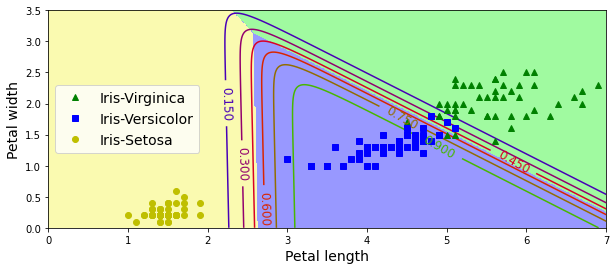

In [91]:

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

In [89]:
softmax_reg.predict([[5, 2]])

array([2])

In [90]:
softmax_reg.predict_proba([[5, 2]]) 
# probability for class 1 2 3

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises

## Batch Gradient.D with early stopping for softmax regression

In [93]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
X[:2]

array([[1.4, 0.2],
       [1.4, 0.2]])

In [96]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]
X_with_bias[:2]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2]])

In [97]:
np.random.seed(2042)

In [98]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [103]:
X.shape[0] == X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]

True

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [107]:
def to_one_hot(y):
    n_classes = y.max() + 1 # 3 classes
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes)) # 150 rows and 3 columns == 150 instances and 3 classes
    Y_one_hot[np.arange(m), y] = 1 # impute 1 for true classes and 0 for others
    return Y_one_hot

In [108]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [109]:

to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [110]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)


Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [111]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [112]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting nan values.

In [114]:
eta = 0.01 # learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 6.101695333134016
500 0.7495955964003087
1000 0.6335867601044719
1500 0.5627809964824694
2000 0.5154218410707394
2500 0.48116101400112515
3000 0.45483325048430245
3500 0.4336617868483096
4000 0.4160434121580319
4500 0.4009931010780987
5000 0.38787288168306744


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [115]:
Theta

array([[ 3.68653944,  0.10079783, -1.99541063],
       [ 0.33885719,  1.11266289,  0.75252074],
       [-0.85514954,  1.11918494,  3.57304747]])

In [116]:
# predict on validation set
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of Theta since this corresponds to the bias term). Also, let's try increasing the learning rate eta.

In [117]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.401014020496038
500 0.5399802167300589
1000 0.5055073771883054
1500 0.49536398902092704
2000 0.49156703270914
2500 0.49001340740014937
3000 0.48934877664358845
3500 0.4890571726734537
4000 0.488927251858594
4500 0.48886880231172963
5000 0.4888423408562912


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [118]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [119]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.6493356854880625
500 0.5669748012204154
1000 0.5419107848691385
1500 0.5350832456702976
2000 0.5330576580213247
2500 0.5325724165002779
2701 0.5325460643024782
2702 0.5325460649360696 early stopping!


In [120]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

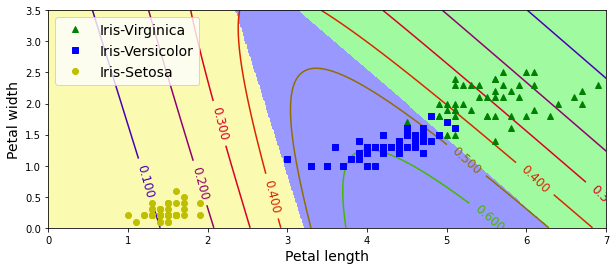

In [121]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [122]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333